In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import sidetable
import re 

In [292]:
plt.style.use(['ggplot'])

In [293]:
style_list = ['default', 'classic'] + sorted(
    style for style in plt.style.available
    if style != 'classic' and not style.startswith('_'))

In [294]:
#style_list

In [295]:
df= pd.read_pickle("data/data_final.pickle") #Abrimos el dataframe

In [296]:
df.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa,nubes_lista,Lenguaje,plataforma_lista
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,...,Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN,29999,Salario muy bajo,NO,"[GitHub , Kaggle]","[Python, R]",[Vim / Emacs]
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,"Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",unknown,NaN,69999,Salario muy bajo,NO,[unknown],"[ SQL, C, C++, Java]","[Notepad++, Jupyter Notebook]"


In [297]:
df.shape

(25973, 27)

In [298]:
df.dtypes

level_0                     int64
index                       int64
time                        int64
age                        object
gender                     object
pais                       object
formacion                  object
puesto                     object
experiencia_prog           object
lenguaje_top               object
exp_ml                     object
tamaño_empresa             object
uso_ml                     object
salario                    object
inversion_ml               object
ppal_herramienta_data      object
lenguaje_prog              object
plataforma                 object
plat_cursos                object
nubes                      object
plataforma_top             object
salario_max                 Int64
rango_salario            category
europa                     object
nubes_lista                object
Lenguaje                   object
plataforma_lista           object
dtype: object

#### Vamos a ir recorriendo cada una de las preguntas y llamando a los diferentes funciones creadas, generandon los dataframes ajustados para poder responder y sacar conclusiones de la mejor manera

### - ¿Cual es el ratio de hombres y mujeres segun el perfil? (posibilidad nivel mundial)
- Columnas que toca:
        - 'gender'= no tiene nulos asique esta lista, verificar unique para descartar que no tenga cosas raras.
        - 'puesto' = tampoco tiene nulos, ver uniques y ver si recategorizamos por menos cantidades.


In [299]:
df['puesto'].unique()# Verificamos valores unicos de la columna puesto 

array(['Other', 'Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Currently not employed', 'Student',
       'Data Scientist', 'Data Analyst', 'Machine Learning Engineer',
       'Business Analyst', 'Data Engineer', 'Product Manager',
       'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer'], dtype=object)

In [300]:
df['puesto'].value_counts()# hacemos un conteo de los mismos

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: puesto, dtype: int64

Para nuestra pregunta vamos a creamos un nuevo dataframe que no contemple como puesto las categorias 'Student', 'Other' y 'Currently not employed'

In [301]:
df_puesto_genero= df[ ~df['puesto'].isin(['Student','Other', 'Currently not employed'])] 

In [302]:
df_puesto_genero.shape

(14790, 27)

In [303]:
df_puesto_genero['puesto'].unique()

array(['Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Business Analyst', 'Data Engineer',
       'Product Manager', 'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer'], dtype=object)

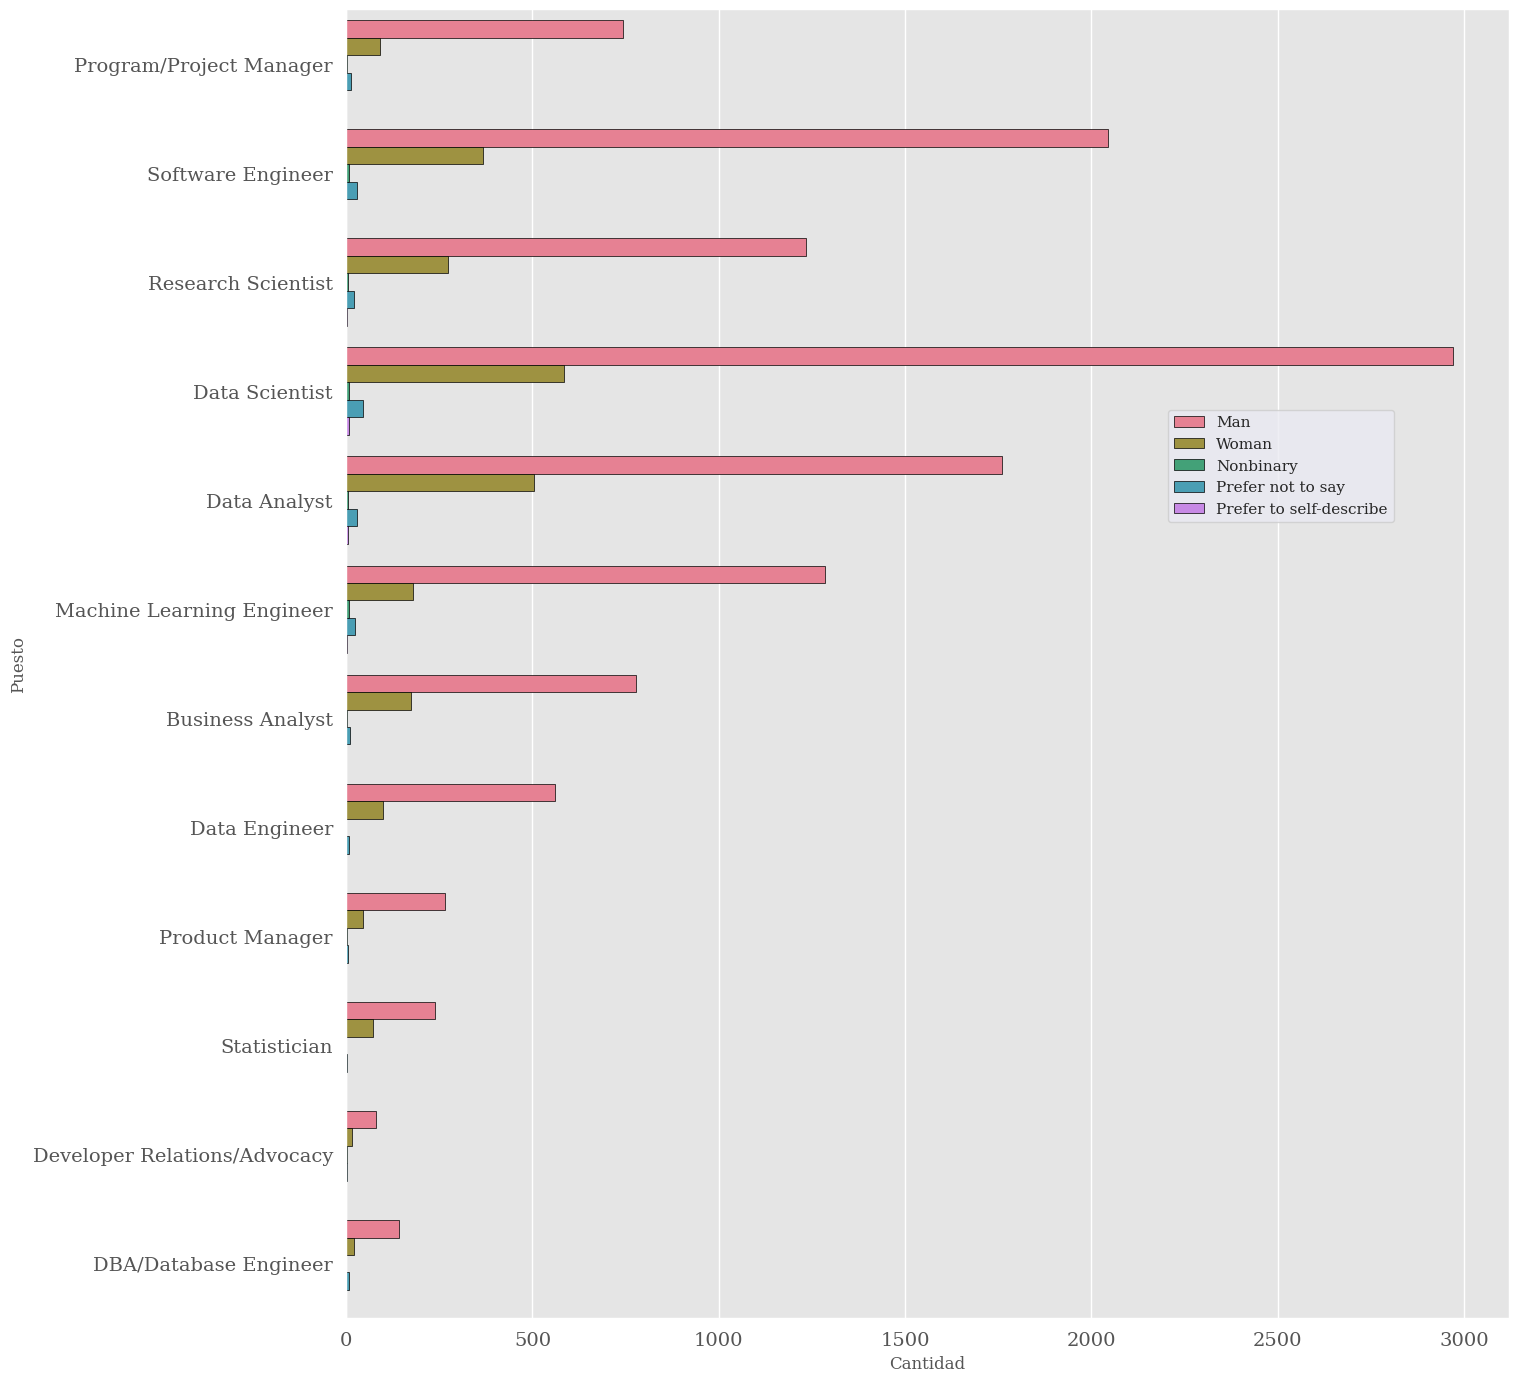

In [304]:
plt.figure(figsize = (15, 17))

fig = sns.countplot(data = df_puesto_genero, y = "puesto", hue = "gender", palette = "husl", edgecolor = "black")

fig.set(xlabel = "Cantidad", ylabel = "Puesto")

sns.set(font = "serif")

plt.legend(bbox_to_anchor = (0.7, 0.7))

plt.xlabel("Cantidad", fontsize = 20, font = "serif")
plt.ylabel("Puesto", fontsize = 20, font = "serif")

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

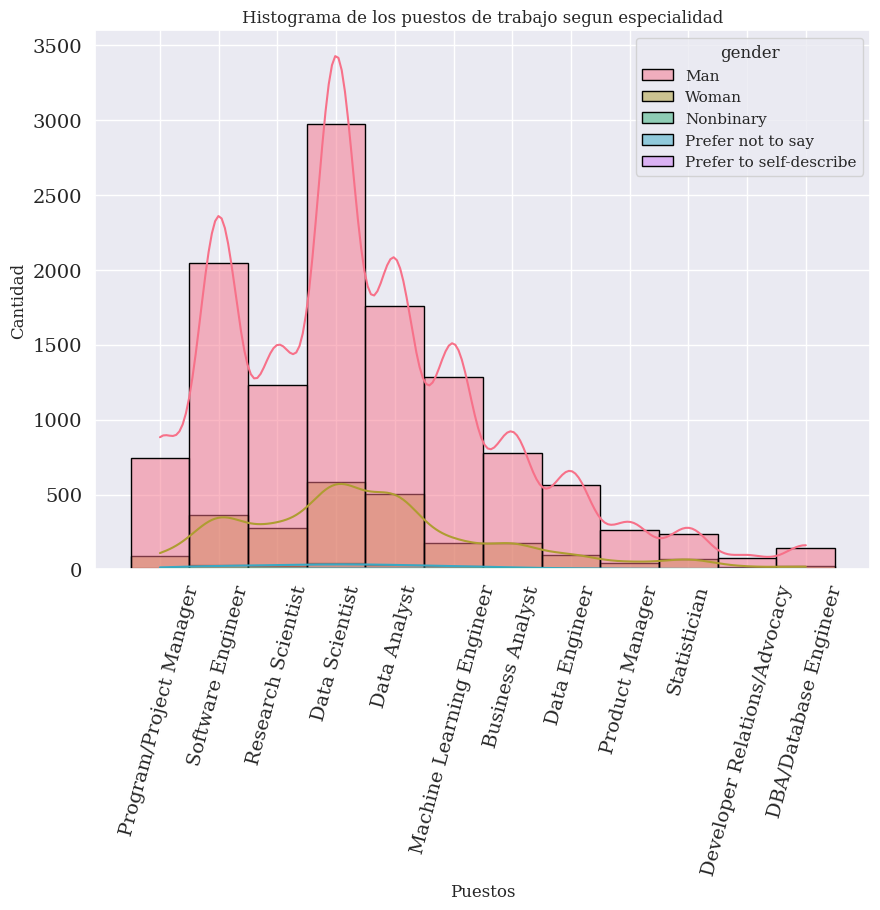

In [305]:
plt.figure(figsize =(10,7))

fig = sns.histplot(x='puesto', data = df_puesto_genero, palette = "husl", hue = 'gender', edgecolor = "black",kde=True)
fig.set_title('Histograma de los puestos de trabajo segun especialidad')
plt.xticks(rotation= 75)
plt.xlabel("Puestos", fontsize = 20, font = "serif")
plt.ylabel("Cantidad", fontsize = 20, font = "serif")

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

plt.show()

### Conclusiones:

#### podriamos hacer un grafico de porcentajes por cada puesto con los porcentajes segun genero no se me ocurre como

---

### - ¿Cual es perfil educativo para cada puesto? (Europa)
- Columnas que toca:
    - puesto = no tiene nulos ver si categorizamos mejor o si nos enfocamos en uno en particular.
    - formacion= no tiene nulos, ver que hacer con studens o los que no respondieron.
Ver si damos vuelta de rosca y lo profundizamos mas para mujeres y un pais o continente especifico!

In [306]:
df.head()

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa,nubes_lista,Lenguaje,plataforma_lista
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,...,Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN,29999,Salario muy bajo,NO,"[GitHub , Kaggle]","[Python, R]",[Vim / Emacs]
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,"Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",unknown,NaN,69999,Salario muy bajo,NO,[unknown],"[ SQL, C, C++, Java]","[Notepad++, Jupyter Notebook]"
2,2,2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,...,"PyCharm ,Jupyter Notebook, Other",DataCamp,I do not share my work publicly,NaN,999,Salario muy bajo,NO,[I do not share my work publicly],"[Python, C++, Java]","[PyCharm , Jupyter Notebook, Other]"
3,3,3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,...,"Spyder,Jupyter Notebook",edX,unknown,NaN,39999,Salario muy bajo,NO,[unknown],[Python],"[Spyder, Jupyter Notebook]"
4,4,4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,...,"Spyder,MATLAB ,Jupyter Notebook","Kaggle Learn Courses,Udemy",I do not share my work publicly,NaN,39999,Salario muy bajo,NO,[I do not share my work publicly],"[Python, C, MATLAB]","[Spyder, MATLAB , Jupyter Notebook]"


In [307]:
df_europa_puestos=df_puesto_genero[ df_puesto_genero['europa'] == 'SI'] #FILTRAMOS DESDE EL DF QUE NO TIENE EN CUENTA 'Student','Other', 'Currently not employed'

In [308]:
df_europa_puestos.shape

(2568, 27)

In [309]:
df_europa_puestos['pais'].unique() #VER QUE HACEMOS CON RUSSIA

array(['Greece', 'Belgium', 'Poland', 'Russia', 'France', 'Italy',
       'Sweden', 'Spain', 'Austria', 'Ireland', 'Ukraine', 'Denmark',
       'Germany', 'Portugal', 'Netherlands', 'Romania', 'Switzerland',
       'Norway', 'Belarus', 'Czech Republic'], dtype=object)

In [310]:
df_europa_puestos['pais'].value_counts()

Russia            510
Spain             314
Germany           304
France            273
Italy             214
Poland            163
Ukraine           128
Netherlands       108
Portugal           77
Greece             70
Sweden             54
Ireland            49
Romania            47
Czech Republic     47
Switzerland        43
Belgium            39
Denmark            36
Austria            35
Belarus            34
Norway             23
Name: pais, dtype: int64

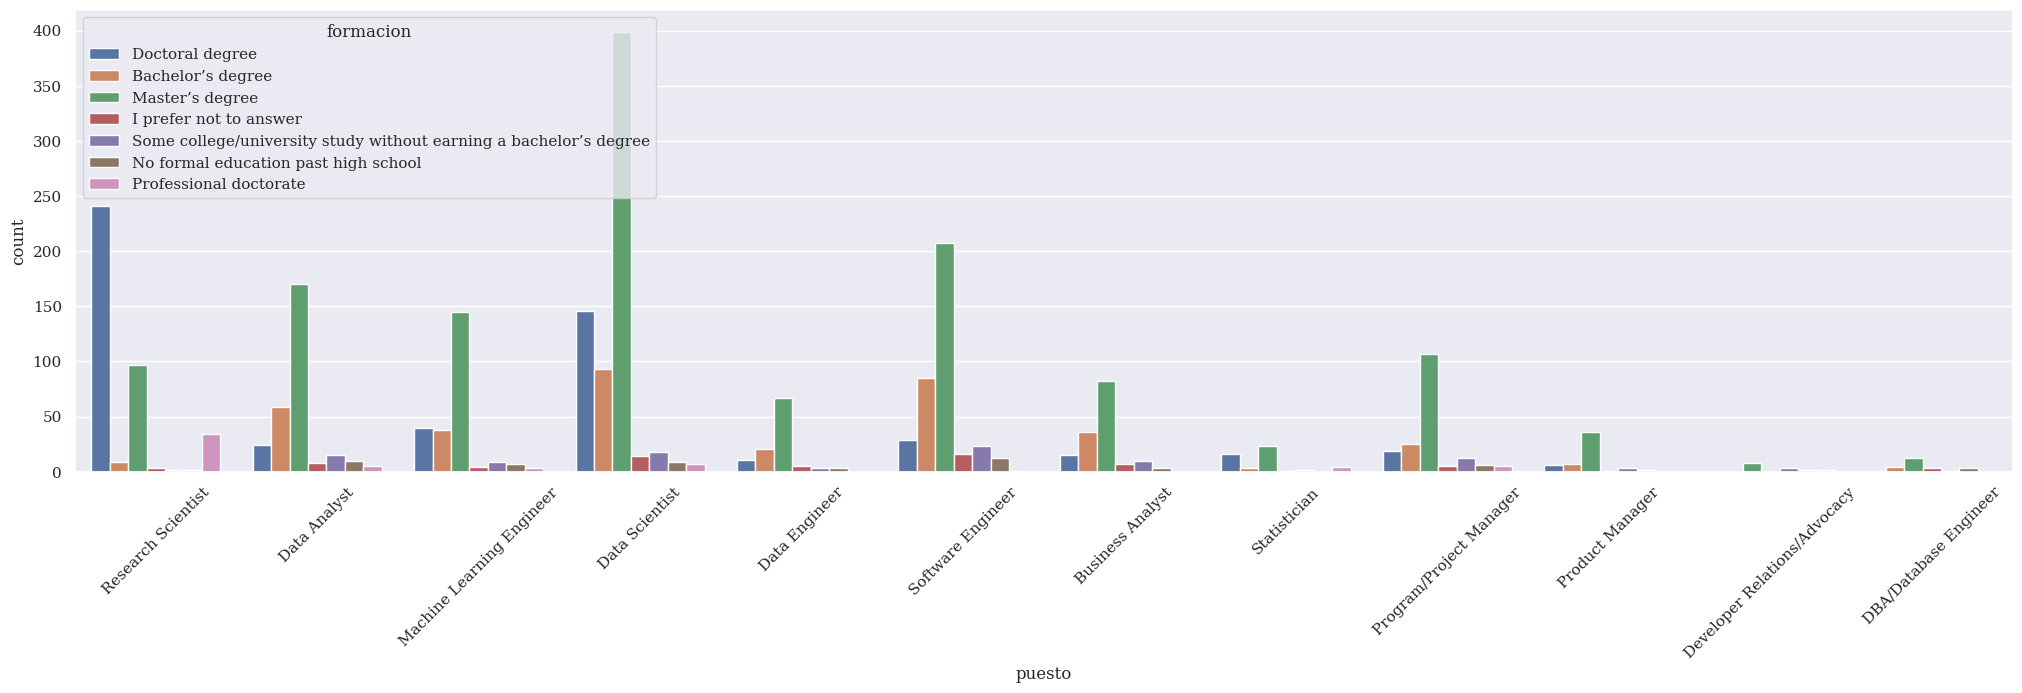

In [311]:
plt.figure( figsize=(25,6))

fig = sns.countplot(x = 'puesto', data = df_europa_puestos, hue= 'formacion')
plt.xticks(rotation = 45)

plt.show(); 

---

### - Herramientas mas utilizadas segun los perfiles. (leguaje_prog y plataforma)(Europa)
- Columnas que toca:
    - ppal_herramienta_data: tiene muchos muchos nulos, ver si podemos aplicar alguno de los metodos de imputer para solucionarlo o en el caso que lo sesgemos solo para un area especifica volver a verificar nulos ahi.
    - puesto = no tiene nulos, ver lo de la recategorizacion
Me parece interesante poder mezclar esta pregunta con otras dos columnas mas como son lenguaje_prog y plataforma para poder tener el combo de todo lo que se usa en ese area.

---

### - ¿Cuál es la diferencia de salarios entre hombres y mujeres segun el perfil? 
- Columnas que toca:
    - gender: no tiene nulos
    - salarios : poder hacer analisis de numeros con medias y demas segun genero.. verificar que cantidad de datos de hombre y mujer hay en el dataframe para jugar un poco con la poderacion.

In [312]:
df_europa_salarios= df[ df['europa'] == 'SI']# filtramos a Europa desde el df total.

In [313]:
df_europa_salarios.shape

(3777, 27)

In [314]:
df_europa_salarios['salario_max'].unique()

<IntegerArray>
[   <NA>,   14999,    2999,   29999,   39999,     999,    3999,   49999,
   59999,  149999,   69999,   19999,   79999,  124999,   24999,    4999,
    1999,   99999,   89999, 1000000,    9999,    7499,  249999,  199999,
  999999,  299999,  499999]
Length: 27, dtype: Int64

<AxesSubplot:xlabel='gender', ylabel='salario_max'>

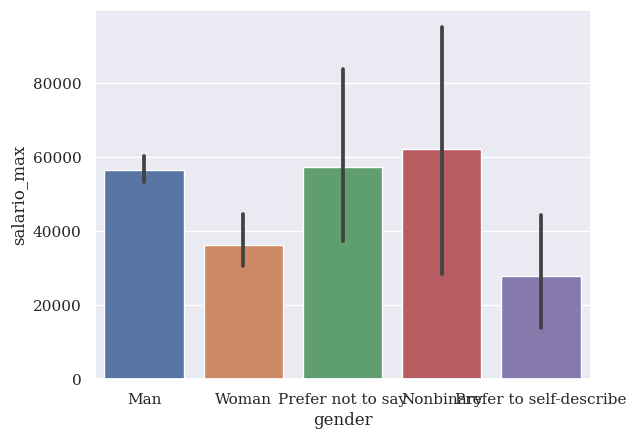

In [315]:
sns.barplot(x='gender',y='salario_max',data= df_europa_salarios)# Media de salarios por genero en paises de europa

In [316]:
df_europa_salarios.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa,nubes_lista,Lenguaje,plataforma_lista
8,8,8,1744,22-24,Man,Russia,Bachelor’s degree,Currently not employed,3-5 years,Python,...,Other,Kaggle Learn Courses,unknown,NaN,<NA>,NaN,SI,[unknown],"[Python, SQL]",[Other]
15,15,15,563,35-39,Man,Greece,Doctoral degree,Research Scientist,10-20 years,Python,...,Spyder,"Udacity,University Courses (resulting in a uni...",unknown,NaN,14999,Salario muy bajo,SI,[unknown],"[Python, C, C++, MATLAB]",[Spyder]


In [317]:
df_europa_salarios.columns

Index(['level_0', 'index', 'time', 'age', 'gender', 'pais', 'formacion',
       'puesto', 'experiencia_prog', 'lenguaje_top', 'exp_ml',
       'tamaño_empresa', 'uso_ml', 'salario', 'inversion_ml',
       'ppal_herramienta_data', 'lenguaje_prog', 'plataforma', 'plat_cursos',
       'nubes', 'plataforma_top', 'salario_max', 'rango_salario', 'europa',
       'nubes_lista', 'Lenguaje', 'plataforma_lista'],
      dtype='object')

In [318]:
df_europa_salarios.stb.missing()

,missing,total,percent
plataforma_top,3364,3777,89.065396
inversion_ml,1131,3777,29.944400
salario,1101,3777,29.150119
rango_salario,1101,3777,29.150119
salario_max,1101,3777,29.150119
uso_ml,998,3777,26.423087
tamaño_empresa,963,3777,25.496426
plat_cursos,920,3777,24.357956
ppal_herramienta_data,829,3777,21.948636
exp_ml,193,3777,5.109876


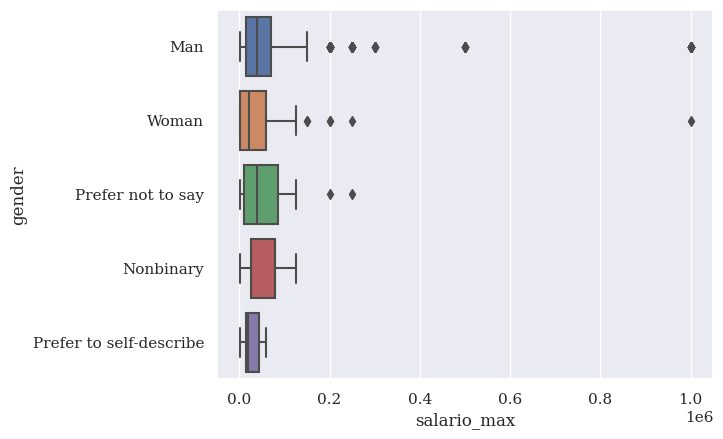

In [319]:
sns.boxplot(x = 'salario_max', y='gender',   data = df_europa_salarios); 

In [320]:
df_europa_salarios['salario_max'].mean()

53804.49738415545

In [321]:
df_europa_salarios['salario_max'].min()

999

In [322]:
df_europa_salarios['salario_max'].max()

1000000

In [323]:
df_europa_salarios['salario_max'].median()

39999.0

In [324]:
from sklearn.impute import SimpleImputer

### Ver si decidimos sacar medianas por puesto para reemplazar mas equitativamente!

In [325]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)# Reemplazamos nulos por mediana

In [326]:
imputer = imputer.fit(df[['salario_max']])

In [327]:
df_europa_salarios['salario_max_imputer'] = imputer.transform(df_europa_salarios[['salario_max']])

/var/folders/db/hp0l5_js4yv8br5y2tc3frpm0000gn/T/ipykernel_29852/2062901643.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='gender', ylabel='salario_max_imputer'>

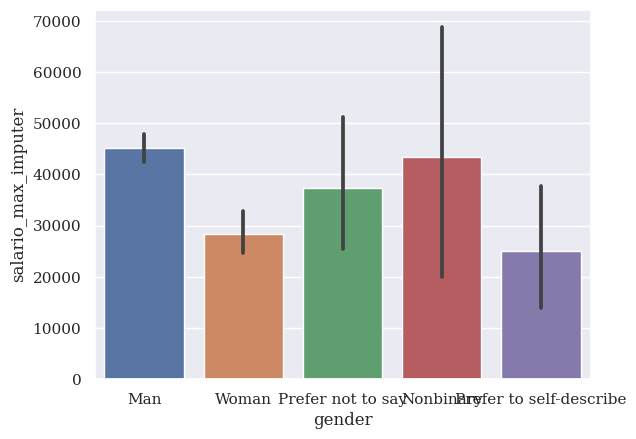

In [328]:
sns.barplot(x='gender',y='salario_max_imputer',data= df_europa_salarios)

In [329]:
import plotly.express as px # VER DE GESTIONAR LOS OUTLAIERS
import pandas as pd


           
fig = px.line_polar(df_europa_salarios, r = 'salario_max_imputer', theta = 'puesto', line_close = True)

fig.show()

/Users/anamor/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



### - Perfil segun pais que herramientas usan, en coparativa con España.
- Columnas que toca:
    -pais: no tiene nulos, los vamos a fraccionar y analizar solo algunos?
    -herramientas de trabajo tenemos que alinearlo con  loque hagamos con los paises y demas preguntas.
Extras:
- ¿Cómo se distribuye este porcentaje segun los paises?

In [330]:
df_europa= df[ df['europa'] == 'SI']

In [331]:
df_europa.shape

(3777, 27)

### COLUMNA LENGUAJES PROG

In [332]:
df_explode_lenguaje =df_europa.explode('Lenguaje')

In [333]:
df_group_lenguajes =pd.DataFrame(df_explode_lenguaje.groupby('Lenguaje')['Lenguaje'].count())
df_group_lenguajes

,Lenguaje
Lenguaje,
Bash,570
C,407
C++,628
Java,518
Javascript,523
Julia,67
MATLAB,373
None,47
Other,531


In [334]:
df_group_lenguajes.rename(columns={'Lenguaje':'conteo_eleccion'}, inplace= True)

In [335]:
df_group_lenguajes.reset_index(inplace=True)

In [336]:
def porcentajes (x):
    return round((x/df_europa.shape[0])*100, 2)

In [337]:
df_group_lenguajes['porcentaje']= df_group_lenguajes['conteo_eleccion'].apply(porcentajes)
df_group_lenguajes

,Lenguaje,conteo_eleccion,porcentaje
0,Bash,570,15.09
1,C,407,10.78
2,C++,628,16.63
3,Java,518,13.71
4,Javascript,523,13.85
5,Julia,67,1.77
6,MATLAB,373,9.88
7,None,47,1.24
8,Other,531,14.06
9,R,824,21.82


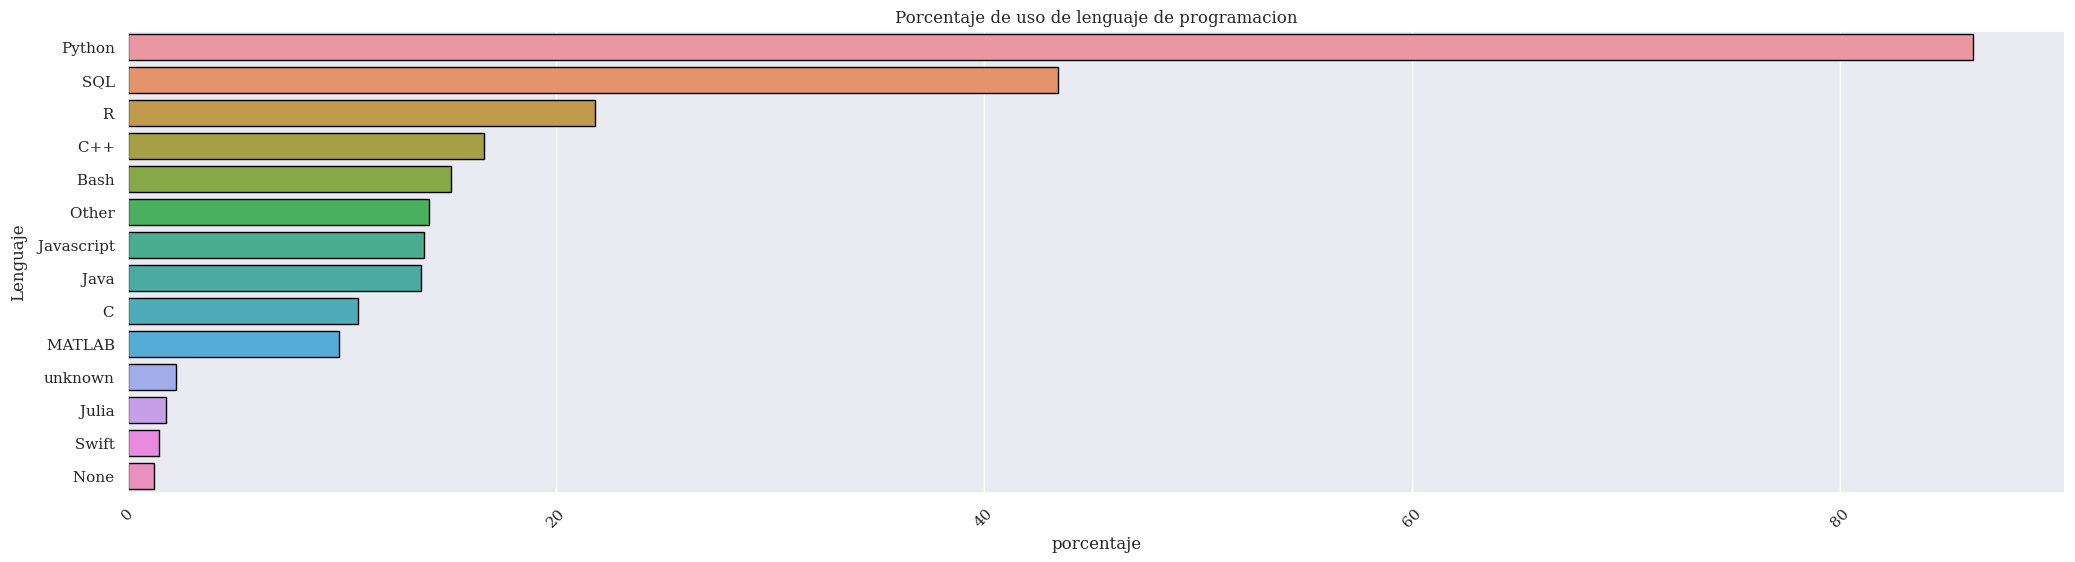

In [338]:
plt.figure( figsize=(25,6))

sns.set_color_codes("pastel")
sns.set(font = "serif")

ordenado =df_group_lenguajes.sort_values("porcentaje", ascending=False)
fig = sns.barplot(x = 'porcentaje', y= 'Lenguaje', data = ordenado, edgecolor = 'black')

plt.title('Porcentaje de uso de lenguaje de programacion')
plt.xticks(rotation = 45)

plt.show(); 

### COLUMNA NUBES

In [339]:
df_europa.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa,nubes_lista,Lenguaje,plataforma_lista
8,8,8,1744,22-24,Man,Russia,Bachelor’s degree,Currently not employed,3-5 years,Python,...,Other,Kaggle Learn Courses,unknown,NaN,<NA>,NaN,SI,[unknown],"[Python, SQL]",[Other]
15,15,15,563,35-39,Man,Greece,Doctoral degree,Research Scientist,10-20 years,Python,...,Spyder,"Udacity,University Courses (resulting in a uni...",unknown,NaN,14999,Salario muy bajo,SI,[unknown],"[Python, C, C++, MATLAB]",[Spyder]


In [340]:
#df_europa['nubes_lista']= df_europa["nubes_lista"].apply(lambda x: x.join)

df_

In [341]:
df_explode_nubes =df_europa.explode('nubes')

In [342]:
df_group_nubes =pd.DataFrame(df_explode_nubes.groupby('nubes')['nubes'].count())
df_group_nubes

,nubes
nubes,
Colab,30
"Colab , Shiny",1
GitHub,264
"GitHub , Colab",62
"GitHub , Colab , Shiny",3
...,...
"Streamlit , NBViewer , GitHub , Personal blog , Kaggle , Colab , Shiny",2
"Streamlit , Personal blog",1
"Streamlit , Personal blog , Kaggle , Colab",1


In [ ]:
df_group_nubes.rename(columns={'nubes':'conteo_eleccion'}, inplace= True)

In [ ]:
df_group_nubes.reset_index(inplace=True)

In [ ]:
df_group_nubes['porcentaje']= df_group_nubes['conteo_eleccion'].apply(porcentajes)
df_group_nubes

In [ ]:
plt.figure( figsize=(25,6))

sns.set_color_codes("pastel")
sns.set(font = "serif")

ordenado =df_group_lenguajes.sort_values("porcentaje", ascending=False)
fig = sns.barplot(x = 'porcentaje', y= 'lista_nubes', data = ordenado, edgecolor = 'black')

plt.title('Porcentaje de uso de lenguaje de programacion')
plt.xticks(rotation = 45)

plt.show(); 

### COLUMNA PLATAFORMA

In [343]:
df_europa.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa,nubes_lista,Lenguaje,plataforma_lista
8,8,8,1744,22-24,Man,Russia,Bachelor’s degree,Currently not employed,3-5 years,Python,...,Other,Kaggle Learn Courses,unknown,NaN,<NA>,NaN,SI,[unknown],"[Python, SQL]",[Other]
15,15,15,563,35-39,Man,Greece,Doctoral degree,Research Scientist,10-20 years,Python,...,Spyder,"Udacity,University Courses (resulting in a uni...",unknown,NaN,14999,Salario muy bajo,SI,[unknown],"[Python, C, C++, MATLAB]",[Spyder]


In [344]:
df_explode_plataforma =df_europa.explode('plataforma_lista')

In [345]:
df_group_plataforma =pd.DataFrame(df_explode_plataforma.groupby('plataforma_lista')['plataforma_lista'].count())
df_group_plataforma

,plataforma_lista
plataforma_lista,
Jupyter Notebooks,890
Notepad++,581
Other,215
Spyder,339
Sublime Text,332
Vim / Emacs,321
etc),21
etc),869
Jupyter (JupyterLab,890


In [ ]:
df_group_plataforma.rename(columns={'nubes':'conteo_eleccion'}, inplace= True)

In [ ]:
df_group_plataforma.reset_index(inplace=True)

In [ ]:
df_group_plataforma['porcentaje']= df_group_plataforma['conteo_eleccion'].apply(porcentajes)
df_group_plataforma

In [ ]:
plt.figure( figsize=(25,6))

sns.set_color_codes("pastel")
sns.set(font = "serif")

ordenado =df_group_lenguajes.sort_values("porcentaje", ascending=False)
fig = sns.barplot(x = 'porcentaje', y= 'lista_nubes', data = ordenado, edgecolor = 'black')

plt.title('Porcentaje de uso de lenguaje de programacion')
plt.xticks(rotation = 45)

plt.show(); 

POR LOGRAR:

Deberiamos poder realizar estos cambios en el archivo 'sprint_review_3_clen, asi los traemos arrastrados a este archivo ya listos para solo responder las preguntas!!!

- que la columna de nubes o la de lista_nubes nos traiga un string por palabra y no un solo string.
- de la columna plataforma o lista_plataforma agrupar con un str.contains las categorias que estan repetidas a una sola!!